In [1135]:
import numpy as np
import pandas as pd

import pandas as pd
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns 

Beggining of Exploratory work

read the car sale csv file

In [1136]:
df = pd.read_csv("Car_sale_ads.csv")
df.columns

Index(['Index', 'Price', 'Currency', 'Condition', 'Vehicle_brand',
       'Vehicle_model', 'Vehicle_version', 'Vehicle_generation',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'CO2_emissions', 'Drive', 'Transmission', 'Type',
       'Doors_number', 'Colour', 'Origin_country', 'First_owner',
       'First_registration_date', 'Offer_publication_date', 'Offer_location',
       'Features'],
      dtype='object')

show the whole 5 rows values because normally the middle columns values won't show

In [1137]:
pd.set_option("display.max.columns", None)
df.head()


,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,CO2_emissions,Drive,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,145.0,1400.0,Gasoline,NaN,Front wheels,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,75.0,1100.0,Gasoline,NaN,Front wheels,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,180.0,1368.0,Gasoline,NaN,NaN,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,160.0,1368.0,Gasoline,139.0,Front wheels,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,165.0,1368.0,Gasoline,NaN,NaN,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


know the dimensions of our dataset where no. of rows=208304 and columns = 25

In [1138]:
df.shape

(208304, 25)

the datatypes of the dataset columns

In [1139]:
df.dtypes

Index                        int64
Price                        int64
Currency                    object
Condition                   object
Vehicle_brand               object
Vehicle_model               object
Vehicle_version             object
Vehicle_generation          object
Production_year              int64
Mileage_km                 float64
Power_HP                   float64
Displacement_cm3           float64
Fuel_type                   object
CO2_emissions              float64
Drive                       object
Transmission                object
Type                        object
Doors_number               float64
Colour                      object
Origin_country              object
First_owner                 object
First_registration_date     object
Offer_publication_date      object
Offer_location              object
Features                    object
dtype: object

the number of null values in each column

In [1140]:
df.isnull().sum()

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Vehicle_version             70222
Vehicle_generation          60444
Production_year                 0
Mileage_km                    983
Power_HP                      643
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

the no. of repition of each unique value in vehicle brand column as we will be using only some of the most repeated brands like audi , Volkswagen and BMW . there are a lot of car brands so we will only use a subset of them

In [1141]:
df['Vehicle_brand'].value_counts()

Volkswagen    18455
BMW           16983
Audi          16730
Opel          16322
Ford          16007
              ...  
FAW               1
MAN               1
Talbot            1
NSU               1
Vanderhall        1
Name: Vehicle_brand, Length: 108, dtype: int64

here we are trying to the unique values we have in our columns to fully understand the data.I also did this on other table columns like power and diplacement to know the unique values but since it was large . i deleted them so that every time i run the whole notebook it doesn't take a lot of time

In [1142]:
df['Condition'].unique()

array(['New', 'Used'], dtype=object)

In [1143]:
df['Transmission'].unique()

array(['Manual', 'Automatic', nan], dtype=object)

In [1144]:
df['Fuel_type'].unique()


array(['Gasoline', 'Gasoline + LPG', 'Diesel', 'Electric', 'Hybrid',
       'Gasoline + CNG', 'Hydrogen', 'Ethanol'], dtype=object)

In [1145]:
df['Type'].unique()

array(['small_cars', 'coupe', 'city_cars', 'convertible', 'compact',
       'SUV', 'sedan', 'station_wagon', 'minivan'], dtype=object)

we will start the data cleaning process

here we are dropping the columns i won't be using in the processas i already prepared my research questions. i would have used the co2 emission . However almost 50% of the its values is null values. i felt like it won't be accurate enough to apply discrimitave descions on.

In [1146]:
df=df.drop(['Currency', 'First_registration_date','Offer_publication_date','Features','Offer_location','First_owner','Origin_country','Colour','Doors_number','Drive','Condition','Vehicle_model','Mileage_km','Vehicle_version','Vehicle_generation','CO2_emissions'], axis=1)

finding outliers

I am trying here to know if there is an error in the production year so I searched if there is any car that was made after 2022 . there was no record satisfying that. 
I decided to eliminate all the cars which was made before 1970 as after i plotted it was hard to recognize all these cars. and actually these are the part i am interested in in my project and they are considered a very small part of the data .

In [1147]:
df.loc[df['Production_year'] > 2022]


df = df.drop(df[df.Production_year < 1970].index)
df.shape

(207750, 9)

removing the outliers of power column

there was two ways to find the outliers . i did both however the second is commented as it provide me with an error when plotting. 

the below one is the first one where i did my research and found that more than 800 is considered outlier as it is almost impossible, rare. so i dropped any row that has power value > 800

In [1148]:
df = df.drop(df[df.Power_HP >= 800].index)
df.shape

(207735, 9)

the second one is that i made a dataset called (df_without_power_null_rows) which is all rows except the rows with power value = null and another one called (df_power_null_rows) with all rows whose power value=null. i used the (df_without_power_null_rows) dataset to convert it to int to be able to find IQR and the outliers. i then subtracted the outliers from the (df_without_power_null_rows) dataset and then appended the (df_power_null_rows). and sorted the rows according to the index to achieve and assigned it to df . this helped me see the outliers while still having the null values.

In [1149]:
# df_without_power_null_rows = df[df.Power_HP.notnull()]
# df_power_null_rows = df[df.Power_HP.isnull()]
# df_power_null_rows.head()

In [1150]:
# df_without_power_null_rows['Power_HP'] = df_without_power_null_rows['Power_HP'].astype('int')

In [1151]:
# Q1 = df_without_power_null_rows['Power_HP'].quantile(0.25)
# Q3 = df_without_power_null_rows['Power_HP'].quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)
# arr_1 = df_without_power_null_rows['Power_HP'] < (Q1 - 1.5 * IQR)
# arr_2 = df_without_power_null_rows['Power_HP'] > (Q3 + 1.5 * IQR)
# mask = (arr_1 | arr_2)
# df_power_cleared_iqr = df_without_power_null_rows[~(mask)]
# df = df_power_cleared_iqr.append(df_power_null_rows)
# df.sort_values("Index")
# print(df.isnull().sum())

removing the outliers from displacement column

In [1152]:
df = df.drop(df[df.Power_HP >= 2100].index)
df.shape
### the avg power is 2000 so more than 2100 was fine for me

(207735, 9)

here is the second method i did as i did in the power column

In [1153]:
# df_without_displacement_null_rows = df[df.Displacement_cm3.notnull()]
# df_displacement_null_rows = df[df.Displacement_cm3.isnull()]
# df_displacement_null_rows.head()

In [1154]:
# df_without_displacement_null_rows['Displacement_cm3'] = df_without_displacement_null_rows['Displacement_cm3'].astype('int')

In [1155]:
# Q1 = df_without_displacement_null_rows['Displacement_cm3'].quantile(0.25)
# Q3 = df_without_displacement_null_rows['Displacement_cm3'].quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)
# arr_1 = df_without_displacement_null_rows['Displacement_cm3'] < (Q1 - 1.5 * IQR)
# arr_2 = df_without_displacement_null_rows['Displacement_cm3'] > (Q3 + 1.5 * IQR)
# mask = (arr_1 | arr_2)
# df_displacment_cleared_iqr = df_without_displacement_null_rows[~(mask)]
# df = df_displacment_cleared_iqr.append(df_power_null_rows)
# df.sort_values("Index")
# df.head

removing price outliers

In [1156]:
z = np.abs(stats.zscore(df['Price']))
filtered_entries = z < 3
df = df[filtered_entries]
print(df.shape)


(204065, 9)


replace the missing values 

In [1157]:
df.isnull().sum()

Index                  0
Price                  0
Vehicle_brand          0
Production_year        0
Power_HP             625
Displacement_cm3    1758
Fuel_type              0
Transmission         459
Type                   0
dtype: int64

fill the missing displacement with the mean of displacement variable

In [1158]:
np.mean(df['Displacement_cm3'])
df['Displacement_cm3'].fillna((df['Displacement_cm3'].mean()), inplace=True) #inplace doesnt require me to aassign result to a new df


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [1159]:
df.isnull().sum()

Index                 0
Price                 0
Vehicle_brand         0
Production_year       0
Power_HP            625
Displacement_cm3      0
Fuel_type             0
Transmission        459
Type                  0
dtype: int64

replace missing values in Power by the mean

In [1160]:
np.mean(df['Power_HP'])
df['Power_HP'].fillna((df['Power_HP'].mean()), inplace=True) #inplace doesnt require me to aassign result to a new df
df.isnull().sum()

Index                 0
Price                 0
Vehicle_brand         0
Production_year       0
Power_HP              0
Displacement_cm3      0
Fuel_type             0
Transmission        459
Type                  0
dtype: int64

replace missing values in transmittion by forward filling method

In [1161]:
df['Transmission'].ffill(inplace=True)
df.isnull().sum()

Index               0
Price               0
Vehicle_brand       0
Production_year     0
Power_HP            0
Displacement_cm3    0
Fuel_type           0
Transmission        0
Type                0
dtype: int64

In [1162]:
# df.head(n=10)
# df.drop('Index',axis=1)

print(df.shape)


(204065, 9)


In [1163]:
print(df.head(n=180642))

         Index   Price Vehicle_brand  Production_year  Power_HP  \
0            0   86200        Abarth             2021     145.0   
1            1   43500        Abarth             1974      75.0   
2            2   44900        Abarth             2018     180.0   
3            3   39900        Abarth             2012     160.0   
4            4   97900        Abarth             2021     165.0   
...        ...     ...           ...              ...       ...   
184732  184732   51900    Volkswagen             2016     102.0   
184733  184733  111900    Volkswagen             2021     102.0   
184734  184734   46900    Volkswagen             2014     140.0   
184735  184735   20000    Volkswagen             2006     105.0   
184736  184736   38000    Volkswagen             2014     140.0   

        Displacement_cm3 Fuel_type Transmission           Type  
0                 1400.0  Gasoline       Manual     small_cars  
1                 1100.0  Gasoline       Manual          coupe  


first research question 
"the difference/relation between the manual cars price and automatic cars price throughout the years?"

here we used lineplot as we wanted to know the difference between the price of manual and automatic cars throughout. continous variable which is production time by .

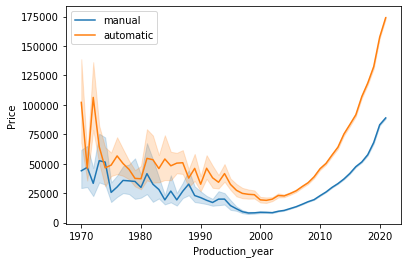

In [1164]:
manual=df['Transmission']=='Manual'
automatic=df['Transmission']=='Automatic'
manual_rows= df.loc[manual]
automatic_rows= df.loc[automatic]
sns.lineplot(x='Production_year',y='Price',data=manual_rows,label='manual')
sns.lineplot(x='Production_year',y='Price',data=automatic_rows,label='automatic')

## The conclusion is that for the car made starting 1970. 
##the automatic cars are more expensive than the automaic cars . 

second research question "what types of cars have the most engine diplacement?"

we used barplot because we had ons string variable fuel type and one continous variable which is displacement

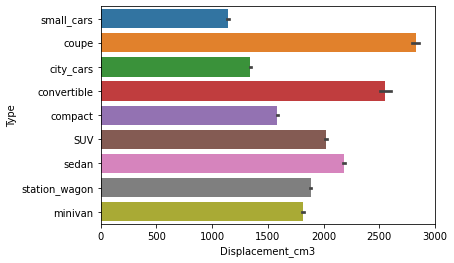

In [1165]:
sns.barplot(data=df,y="Type",x="Displacement_cm3")

### here we found out that coupe cars have the most powerful engine displacemnt 
##then convertible cars then sedan then suv then station wagon then minivan then compact then city cars
###then small cars

third research question is what is the relation between the car power and car engine displacement on different car brands?

we used scatterplot as we want to show a plot of 3 variables the first is car brand which we also wanted to compare the behavior of 3 different car brands within it  and the car power and displacement. so the scatter plot was the optimal solution.

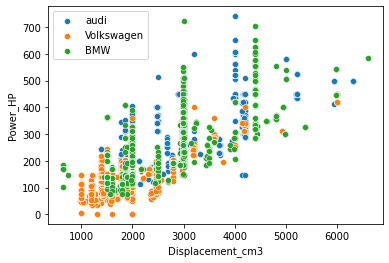

In [1166]:
 
  

audi=df['Vehicle_brand']=='Audi'
volkswagen=df['Vehicle_brand']=='Volkswagen'
bmw=df['Vehicle_brand']=='BMW'


audi_rows= df.loc[audi]
volkswagen_rows= df.loc[volkswagen]
bmw_rows= df.loc[bmw]


sns.scatterplot(x='Displacement_cm3',y='Power_HP',data=audi_rows,label='audi')
sns.scatterplot(x='Displacement_cm3',y='Power_HP',data=volkswagen_rows,label='Volkswagen')
sns.scatterplot(x='Displacement_cm3',y='Power_HP',data=bmw_rows,label='BMW')

#### we concluded that as the displacement increses the car power increases . and that volkswagen 
###doesn't have as much displacemnt as audi and bmw. most of the volexwagen cars here have displacemnt 
###between 1000 and 2000 which is too small compared to audi and bmw as they have alot of cars at 4000 . and 
### volkswagen power as well is very limited .most of the volkswagen cars have power between 0 and 200
### which is too small compared to bmw and audi

forth research question "what fuel type is used by cars with maximum displacement?" 

we used catplot as we had a string variable fuel to compare against a continous variable which is displacement

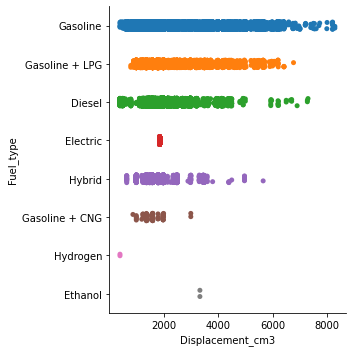

In [1167]:

sns.catplot(y='Fuel_type',x='Displacement_cm3',data=df)

###conclusion: the gasoline is used to give the maximum displacement then diesel then gasoline+LPG 
##then hybrid then ethanol then gasoline+CNG then electric then hydrogen.
###gasoline can be used with all carengines with different diplacements as long s it is 
##before equal to or smaller than 8000 as in the graph

fifth research question "what is the relation between the price and the car engine diplacement?"

we used normal scatter plot as we wanted to know the correlation of the datapoints where we used 2 variables which are price and displacement 

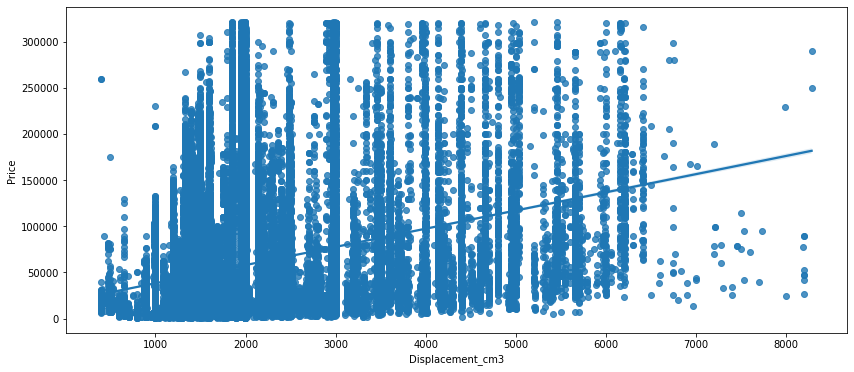

In [1168]:
plt.figure(figsize=(14,6))

sns.regplot(x=df['Displacement_cm3'], y=df['Price'])
##conclusion when the displacement is less than 1000 the price becomes less than 15000. however as we 
### have a displacement bigger than 1000 the prices increase to the extend that it can become more than 
## 300000.